In [1]:
# importing different packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pickle
import matplotlib.image as mpimg
import re
%matplotlib inline

In [2]:
# To map the corner of the 2-d chessboard image (image points) to the 3-D coordinates of undistorted chessboard 
# corners(obj points)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


In [3]:
# The object points represent 3-d coordinates (x,y,z), but as the chessboard will be seen from above, z = 0  and each
# corner will have (x,y) coordinated from (0-8,0-5) starting from top left.

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
# as z = 0 , therefore I use numpy mgrade function to generate coordinates
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # x,y coordinates


In [4]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

In [30]:
# moving through every image
# and performing several steps to remove distortion, find corners and then recalibrate the camera.

for fname in images:
    # reading the image
    img = mpimg.imread(fname)
    # converting the image into gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find the chessboard corners 
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points
    if ret == True:
        print ("Processing the image name: {}".format(fname))
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # Do camera calibration given object points and image points
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        # undistorting the image 
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        # saving the file
        fileidx = re.findall(r'\d+', fname)
        cv2.imwrite('camera_cal/output_files/calibrated'+str(fileidx[0])+'.jpg',dst)
        

Processing the image name: camera_cal/calibration10.jpg
Processing the image name: camera_cal/calibration11.jpg
Processing the image name: camera_cal/calibration12.jpg
Processing the image name: camera_cal/calibration13.jpg
Processing the image name: camera_cal/calibration14.jpg
Processing the image name: camera_cal/calibration15.jpg
Processing the image name: camera_cal/calibration16.jpg
Processing the image name: camera_cal/calibration17.jpg
Processing the image name: camera_cal/calibration18.jpg
Processing the image name: camera_cal/calibration19.jpg
Processing the image name: camera_cal/calibration2.jpg
Processing the image name: camera_cal/calibration20.jpg
Processing the image name: camera_cal/calibration3.jpg
Processing the image name: camera_cal/calibration6.jpg
Processing the image name: camera_cal/calibration7.jpg
Processing the image name: camera_cal/calibration8.jpg
Processing the image name: camera_cal/calibration9.jpg


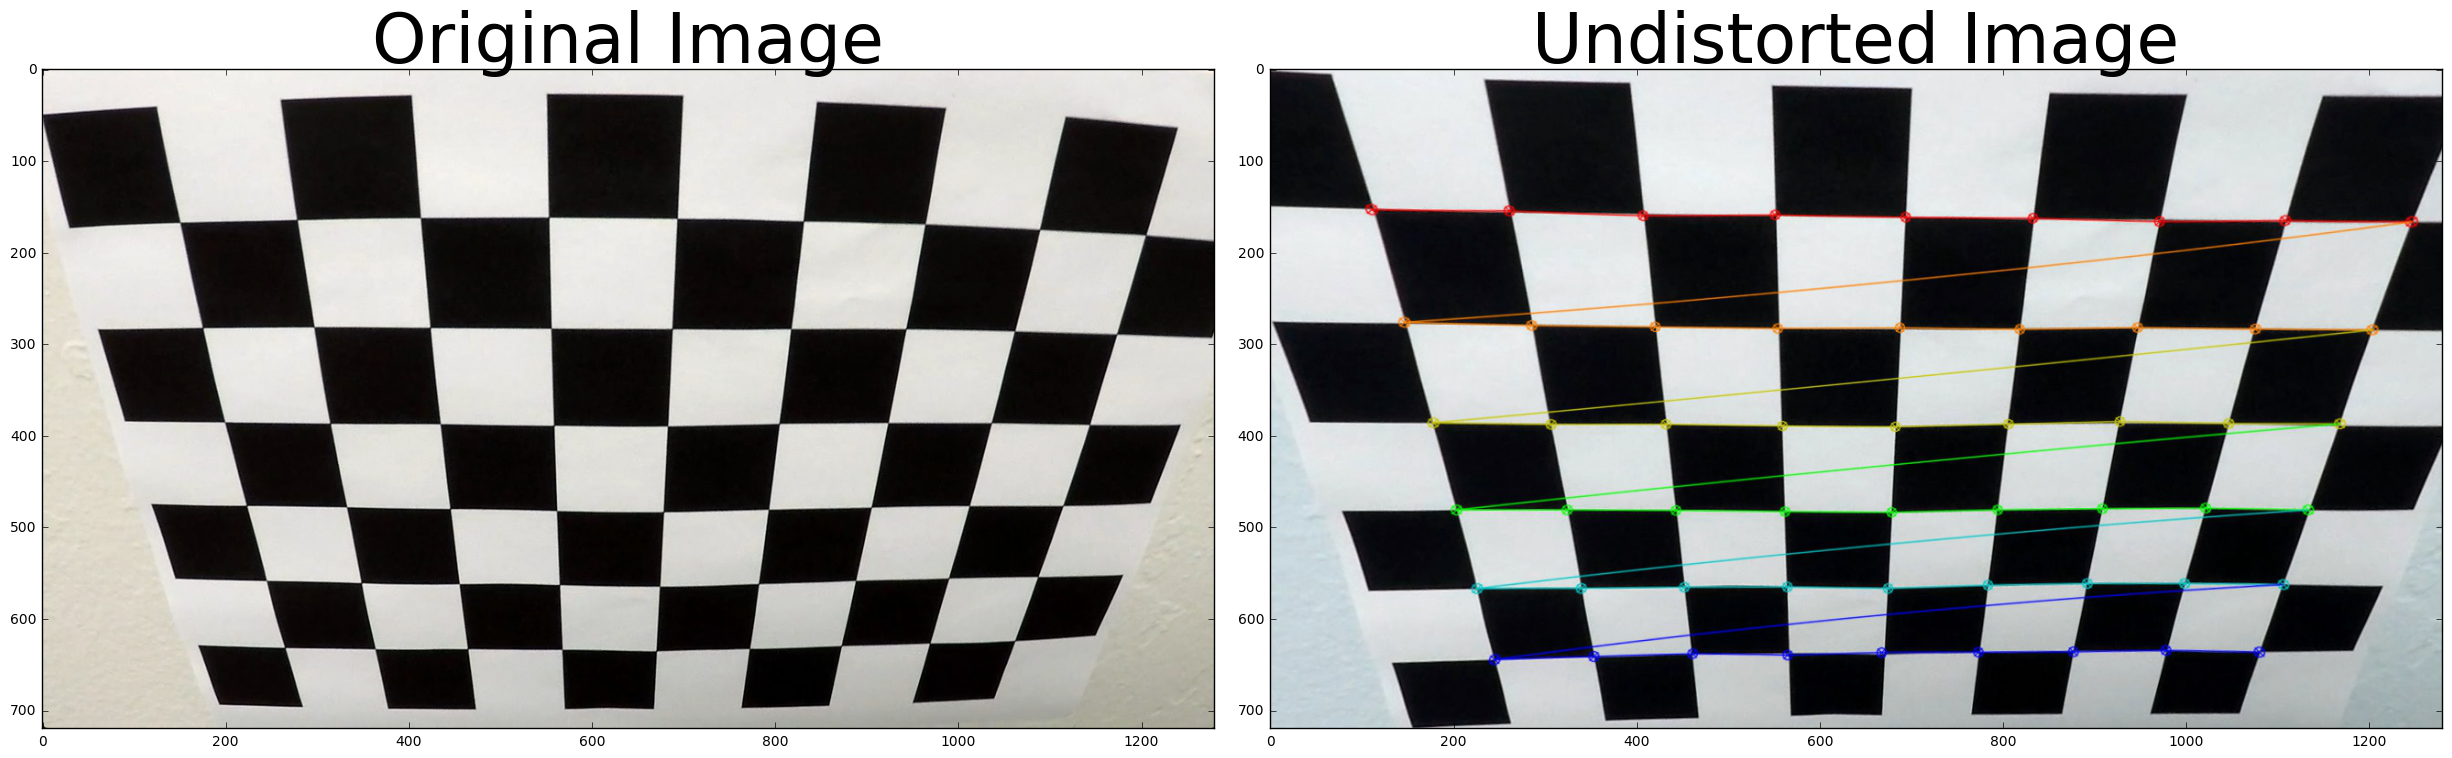

In [35]:
# show one image for testing

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(mpimg.imread('camera_cal/calibration2.jpg'))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mpimg.imread('camera_cal/output_files/calibrated2.jpg'))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [36]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./camera_cal/calibration_pickle.p", "wb" ) )
